In [105]:
import numpy as np
import pandas as pd
import os, sys

import json

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [106]:
data_dir = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/random/TransientTable_Jul24_possis2param"
save_dir = "./pics/random/"
os.makedirs(save_dir, exist_ok=True)
data_files = [
    file for file in os.listdir(data_dir) if ".csv" in file and "~lock" not in file
]

total_dataframe = pd.DataFrame()
for datafile in data_files:
    tmp_df = pd.read_csv(os.path.join(data_dir, datafile), sep=";")
    total_dataframe = pd.concat((total_dataframe, tmp_df))


total_entries = len(total_dataframe)

In [107]:
print(total_entries)

44750


In [108]:
def jsonify(string: str):
    if type(string) != str:
        return ""
    tmp_str = string.replace("'", '"')
    tmp_str = tmp_str.replace("None", "null")
    tmp_str = tmp_str.replace("True", "true")
    tmp_str = tmp_str.replace("False", "false")
    tmp_str = tmp_str.replace("inf", "Infinity")

    return tmp_str

## CHISQUARE STUFF

In [109]:
# print(total_dataframe.head())


pos_rowslist_dict = {
    "bns_maurice_1": [],
    "bns_maurice_2": [],
    "bns_maurice_3": [],
    "bns_maurice_4": [],
}
total_dataframe["ndet"] = np.zeros(len(total_dataframe))
rowslist = []
ndet_list = []
for k, row in total_dataframe.iterrows():
    dec_str = jsonify(row["rise_decline"])
    # print(tmp_str)
    dec_dict = json.loads(dec_str)
    # print(dec_dict["ndet"], row["kilonovaness"])

    ndet_list.append(dec_dict["ndet"])

    rowslist.append(dec_dict)

    # print(row["chisquares"])
    pos_str = jsonify(row["chisquares"])
    # print(row["chisquares"])
    # print(pos_str)
    if pos_str != "":
        pos_dict = json.loads(pos_str)
        # print(pos_dict)
        for key, value in pos_dict.items():
            value["ndet"] = dec_dict["ndet"]
            value["latest_det"] = dec_dict["jd_last"]
            value["first_det"] = dec_dict["jd_det"]
            value["kilonovaness"] = row["kilonovaness"]
            value["map_seed"] = row["map_seed"]
            value["map_dist"] = row["map_dist"]
            value["map_area"] = row["map_area"]
            if value["ndof"] > 0:
                value["red_chisqu"] = value["chisq"] / value["ndof"]
            else:
                value["red_chisqu"] = -999
            pos_rowslist_dict[key].append(value)
    # print(row["rise_decline"]["ndet"])

total_dataframe["ndet"] = ndet_list

print(rowslist[0])
print(len(rowslist))
pos_df_dict = {}
for key in pos_rowslist_dict:
    pos_df_dict[key] = pd.DataFrame(pos_rowslist_dict[key]).sort_values(by="ndet")

print(len(pos_df_dict[key]))

{'ndet': 5, 'frac_pos': 1.0, 'jd_det': 2459164.8586574, 'jd_last': 2459166.8463079, 't_lc': 1.9876504996791482, 't_predetect': 0.06024300027638674, 'mag_det': 19.610206604003906, 'band_det_id': 256, 'mag_last': 19.9067325592041, 'band_last_id': 256, 'mag_min': 19.584199905395508, 'jd_min': 2459165.762037, 'bool_pure': True, 'jd_peak_ztfg': 2459164.7606366, 'jd_peak_ztfi': 2459165.762037, 'rise_slope_ztfi': 3.8425515801301127, 'rise_slopesig_ztfi': 0.12231411839311314, 'fall_slope_ztfi': -24.40195607705821, 'fall_slopesig_ztfi': -1.5807511769547853, 'jd_peak_ztfr': 2459164.7984144, 'bool_rise': False, 'bool_fall': False, 'bool_peaked': False, 'bool_fastrise': None, 'bool_fastfall': None, 'bool_hasgaps': False, 'det_bands': 448, 'ztfg-ztfr_det': 0.497600555419922, 'ztfr-ztfi_det': 0.046773903591354055, 'last_bands': 256, 'success': True, 'eta_ztfi_flux': 0.7310077716160802, 'maximum_slope_ztfi_flux': 1554.5096097345536, 'period_0_ztfi_flux': 3.1057039057486686, 'period_s_to_n_0_ztfi_flux

In [110]:
total_dataframe[["kilonovaness", "ndet", "rise_decline"]]

kilonovaness  ndet                                       rise_decline
0               3     5  {'ndet': 5, 'frac_pos': 1.0, 'jd_det': 2459164...
1               1     2  {'ndet': 2, 'frac_pos': 1.0, 'jd_det': 2459164...
0               6     1  {'ndet': 1, 'frac_pos': 1.0, 'jd_det': 2458782...
1               4     4  {'ndet': 4, 'frac_pos': 1.0, 'jd_det': 2458782...
2               1     1  {'ndet': 1, 'frac_pos': 1.0, 'jd_det': 2458781...
..            ...   ...                                                ...
100             1     1  {'ndet': 1, 'frac_pos': 1.0, 'jd_det': 2458724...
101             1     1  {'ndet': 1, 'frac_pos': 1.0, 'jd_det': 2458722...
102             1     1  {'ndet': 1, 'frac_pos': 1.0, 'jd_det': 2458722...
0               3     2  {'ndet': 2, 'frac_pos': 1.0, 'jd_det': 2459027...
0               6     1  {'ndet': 1, 'frac_pos': 1.0, 'jd_det': 2460016...

[44750 rows x 3 columns]

In [111]:
keys = list(pos_df_dict.keys())
key = keys[0]

fig = go.Figure()

max_red_chisq = 100
n_bins = 10
bins = np.linspace(0.8, max_red_chisq, n_bins)
print("bins:", bins)

os.makedirs(save_dir, exist_ok=True)
for key in keys[:]:

    total_number = len(pos_df_dict[key])
    print(f"% entries with fit:", key, ": ", total_number / total_entries)
    above_0_ndof = len(pos_df_dict[key][pos_df_dict[key]["ndof"] > 0])
    percentage_above_0_ndof = above_0_ndof / total_entries * 100
    print("ndof > 0:", above_0_ndof, "is", percentage_above_0_ndof, "%")

    tmp_data = pos_df_dict[key].copy()[
        np.logical_and(
            pos_df_dict[key]["chisq"] <= max_red_chisq, pos_df_dict[key]["chisq"] >= 0.8
        )
    ]

    tmp_hist = np.histogram(tmp_data["red_chisqu"], bins=bins)
    # print(tmp_hist)

    fig.add_trace(go.Bar(x=bins, y=tmp_hist[0] / total_entries * 100, name=key))
    # fig.add_trace(go.Histogram(x=tmp_data["chisq"], name=key))
fig.update_layout(
    {
        "xaxis_title": "reduced chisqu",
        "yaxis_title": "Portion of all candidates (%)",
        "title": "Reduced chisqu. distribution over random maps",
        "width": 600,
    }
)
fig.show()

filename = os.path.join(save_dir, "chisqu_dist.pdf")
fig.write_image(filename)

bins: [  0.8         11.82222222  22.84444444  33.86666667  44.88888889
  55.91111111  66.93333333  77.95555556  88.97777778 100.        ]
% entries with fit: bns_maurice_1 :  0.46916201117318435
ndof > 0: 9177 is 20.507262569832402 %
% entries with fit: bns_maurice_2 :  0.46916201117318435
ndof > 0: 9177 is 20.507262569832402 %
% entries with fit: bns_maurice_3 :  0.46916201117318435
ndof > 0: 9177 is 20.507262569832402 %
% entries with fit: bns_maurice_4 :  0.46916201117318435
ndof > 0: 9177 is 20.507262569832402 %


## NDET STUFF

In [112]:
ndet_hist = np.histogram(total_dataframe["ndet"], bins=np.max(total_dataframe["ndet"]))

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=np.arange(np.max(total_dataframe["ndet"])), y=ndet_hist[0] / total_entries
    )
)
fig.update_layout(
    {
        "xaxis_title": "Number of detections",
        "yaxis_title": "Counts (relative)",
        "xaxis_range": (0, 25),
        "width": 500,
        "title": "Number of detections in random map events",
    }
)
fig.show()
filename = os.path.join(save_dir, "ndet.pdf")
fig.write_image(filename)

In [113]:
import plotly.express as px

In [114]:
fig = px.density_heatmap(
    x=total_dataframe["ndet"], y=total_dataframe["kilonovaness"], text_auto=True
)
fig.update_traces(
    marker=dict(size=2, line=dict(width=2, color="DarkSlateGrey")),
    selector=dict(mode="markers"),
)
fig.update_layout({"xaxis_title": "ndet", "yaxis_title": "kilonovaness"})

fig.show()
print(len(total_dataframe["ndet"]))

44750


### MEAN NDET IN RANDOM MAPS

In [115]:
maps = total_dataframe["map_seed"].unique()

max_ndet_list = []
mean_ndet_list = []
std_ndet_list = []
median_ndet_list = []
mean_kilonovaness_list = []
std_kilonovaness_list = []
max_kilonovaness_list = []
median_kilonovaness_list = []


for k, map in enumerate(maps):
    tmp_df = total_dataframe.copy()[total_dataframe["map_seed"] == map]

    mean_ndet_list.append(np.mean(tmp_df["ndet"]))
    max_ndet_list.append(np.max(tmp_df["ndet"]))
    median_ndet_list.append(np.median(tmp_df["ndet"]))
    std_ndet_list.append(np.std(tmp_df["ndet"]))

    mean_kilonovaness_list.append(np.mean(tmp_df["kilonovaness"]))
    std_kilonovaness_list.append(np.std(tmp_df["kilonovaness"]))
    max_kilonovaness_list.append(np.max(tmp_df["kilonovaness"]))
    median_kilonovaness_list.append(np.median(tmp_df["kilonovaness"]))

ndet_df = pd.DataFrame(
    {
        "map": maps,
        "max_ndet": max_ndet_list,
        "mean_ndet": mean_ndet_list,
        "std_ndet": std_ndet_list,
        "median_ndet": median_ndet_list,
        "mean_kilonovaness": mean_kilonovaness_list,
        "max_kilonovaness": max_kilonovaness_list,
        "median_kilonovaness": median_kilonovaness_list,
        "std_kilonovaness": std_kilonovaness_list,
    }
)

ndet_df.sort_values(by="mean_ndet", ascending=False)

map  max_ndet  mean_ndet  std_ndet  median_ndet  \
2170   601829917        50  50.000000  0.000000         50.0   
1221  1878653647        38  36.500000  1.118034         36.5   
1409  1997784644        29  23.500000  4.716991         24.5   
1217  1873941741        29  23.111111  4.067334         23.0   
1405  1995400186        23  23.000000  0.000000         23.0   
...          ...       ...        ...       ...          ...   
958   1683273173         1   1.000000  0.000000          1.0   
1094  1778841751         1   1.000000  0.000000          1.0   
1582  2136139036         1   1.000000  0.000000          1.0   
1591  2140572806         1   1.000000  0.000000          1.0   
1261  1908603668         1   1.000000  0.000000          1.0   

      mean_kilonovaness  max_kilonovaness  median_kilonovaness  \
2170           9.000000                 9                  9.0   
1221           4.000000                 4                  4.0   
1409           5.166667                12                  2.0   
1217           5.000000                 9                  4.0   
1405          12.000000                12                 12.0   
...                 ...               ...                  ...   
958            3.000000                 3                  3.0   
1094           5.500000                 7                  5.5   
1582          10.000000                10                 10.0   
1591           8.000000                 8                  8.0   
1261           5.500000                10                  5.5   

      std_kilonovaness  
2170          0.000000  
1221          0.000000  
1409          4.487637  
1217          1.885618  
1405          0.000000  
...                ...  
958           0.000000  
1094          1.500000  
1582          0.000000  
1591          0.000000  
1261          4.500000  

[2671 rows x 9 columns]

In [116]:
from ampel.contrib.hu.t3 import RandomMapGenerator
from ampel.log import AmpelLogger

In [117]:
rmg = RandomMapGenerator.RandomMapGenerator(logger=AmpelLogger())

map_ras = []
map_decs = []
map_times = []
map_dists = []

for seed in ndet_df["map"]:

    rmg.seed = seed
    rmg.generate_randoms()

    map_ras.append(rmg.longitude)
    map_decs.append(rmg.latitude)
    map_times.append(rmg.trigger_time)
    map_dists.append(rmg.distance)

ndet_df["map_ra"] = map_ras
ndet_df["map_dec"] = map_decs
ndet_df["map_time"] = map_times
ndet_df["map_dist"] = map_dists

In [118]:
import matplotlib.pyplot as plt
import matplotlib as mplt

In [119]:
def plot_mwd(
    RA,
    Dec,
    org=0,
    title="Mollweide projection",
    projection="mollweide",
    c=None,
    cmap=plt.get_cmap("magma"),
    norm=mplt.colors.Normalize(),
):
    """RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    """
    x = np.remainder(RA + 360 - org, 360)  # shift RA values
    ind = x > 180
    x[ind] -= 360  # scale conversion to [-180, 180]
    x = -x  # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels + 360 + org, 360)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection=projection)
    sc = ax.scatter(
        np.radians(x),
        np.radians(Dec),
        c=c,
        cmap=cmap,
        marker="o",
        edgecolors="black",
        linewidths=1,
        norm=norm,
    )  # convert degrees to radians
    # fig.colorbar(sc)
    ax.set_xticklabels(tick_labels)  # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)
    return fig, ax, sc

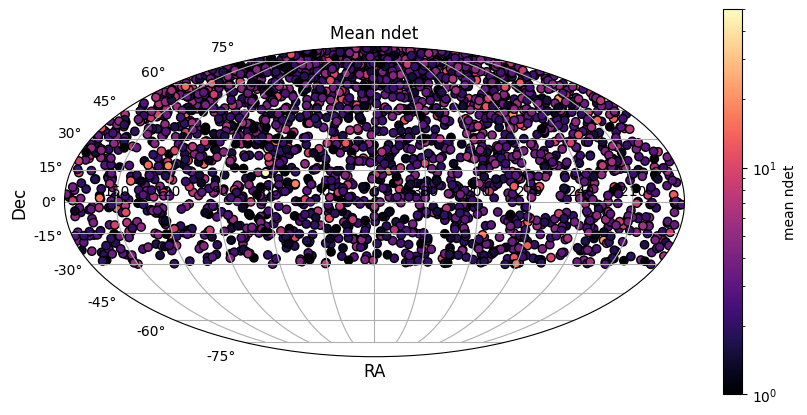

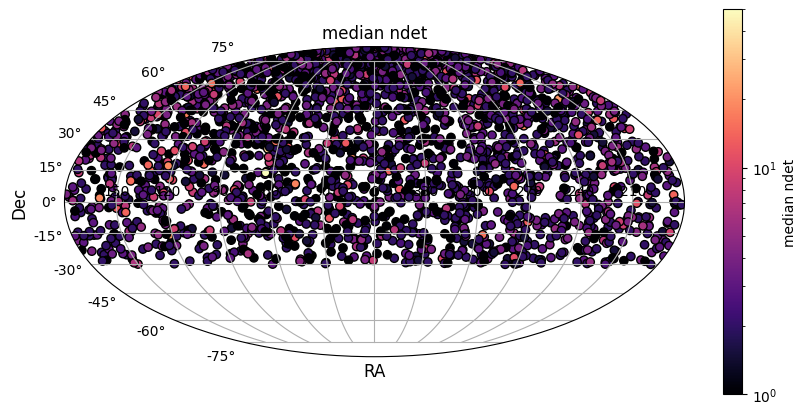

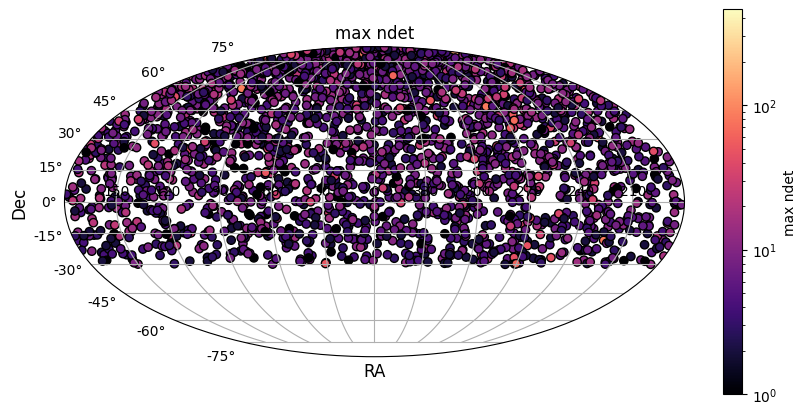

In [120]:
fig, ax, sc = plot_mwd(
    ndet_df["map_ra"],
    ndet_df["map_dec"],
    c=ndet_df["mean_ndet"],
    cmap=plt.get_cmap("magma"),
    norm=mplt.colors.LogNorm(),
)
ax.set_title("Mean ndet")
fig.colorbar(sc).set_label("mean ndet")

fig, ax, sc = plot_mwd(
    ndet_df["map_ra"],
    ndet_df["map_dec"],
    c=ndet_df["median_ndet"],
    cmap=plt.get_cmap("magma"),
    norm=mplt.colors.LogNorm(),
)
ax.set_title("median ndet")
fig.colorbar(sc).set_label("median ndet")

fig, ax, sc = plot_mwd(
    ndet_df["map_ra"],
    ndet_df["map_dec"],
    c=ndet_df["max_ndet"],
    cmap=plt.get_cmap("magma"),
    norm=mplt.colors.LogNorm(),
)
ax.set_title("max ndet")
fig.colorbar(sc).set_label("max ndet")

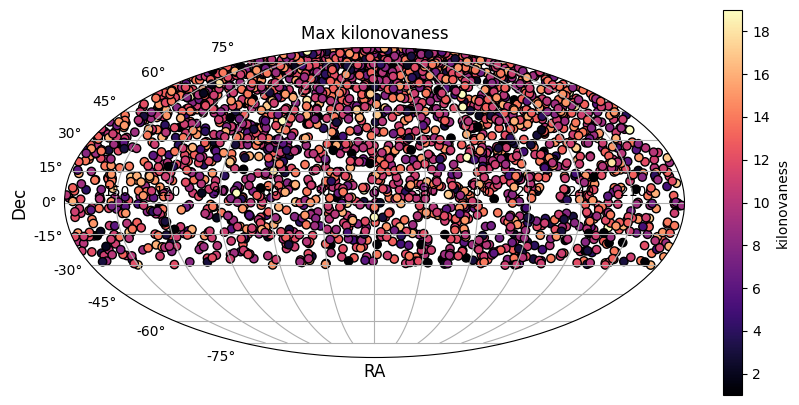

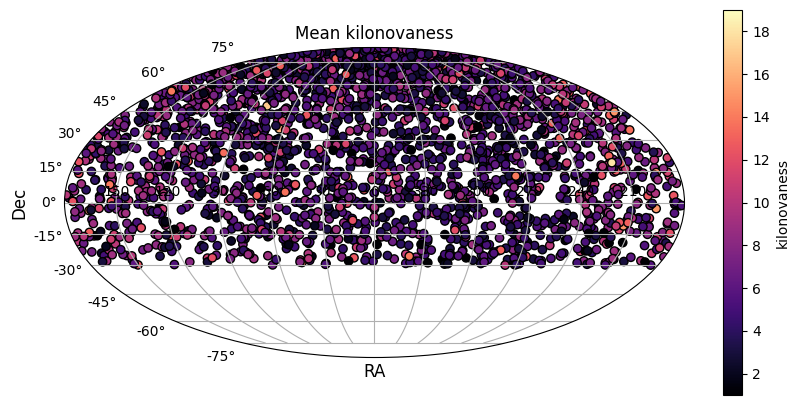

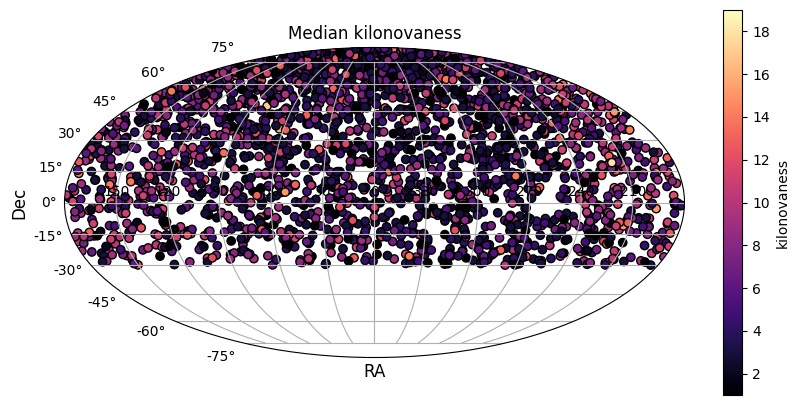

In [121]:
fig, ax, sc = plot_mwd(
    ndet_df["map_ra"], ndet_df["map_dec"], c=ndet_df["max_kilonovaness"]
)
ax.set_title("Max kilonovaness")
fig.colorbar(sc).set_label("kilonovaness")

fig, ax, sc = plot_mwd(
    ndet_df["map_ra"], ndet_df["map_dec"], c=ndet_df["mean_kilonovaness"]
)
ax.set_title("Mean kilonovaness")
fig.colorbar(sc).set_label("kilonovaness")

fig, ax, sc = plot_mwd(
    ndet_df["map_ra"], ndet_df["map_dec"], c=ndet_df["median_kilonovaness"]
)
ax.set_title("Median kilonovaness")
fig.colorbar(sc).set_label("kilonovaness")

In [122]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=ndet_df["mean_kilonovaness"], histnorm="probability"))
fig.update_layout(width=700, xaxis_title="Kilonovaness")
fig.show()
print(len(ndet_df))

2671


In [123]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        y=ndet_df["mean_kilonovaness"],
        x=ndet_df["mean_ndet"],
        mode="markers",
        name="mean kilonovaness",
    )
)
fig.add_trace(
    go.Scatter(
        y=ndet_df["max_kilonovaness"],
        x=ndet_df["mean_ndet"],
        mode="markers",
        name="max kilonovaness",
        opacity=0.4,
    )
)

In [124]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        y=ndet_df["mean_kilonovaness"],
        x=ndet_df["median_ndet"],
        mode="markers",
        name="mean kilonovaness",
    )
)
fig.add_trace(
    go.Scatter(
        y=ndet_df["max_kilonovaness"],
        x=ndet_df["median_ndet"],
        mode="markers",
        name="max kilonovaness",
        opacity=0.4,
    )
)

## BINNED ndet and dist

In [125]:
from scipy.optimize import minimize
from scipy.special import factorial
from scipy.optimize import curve_fit
from scipy import stats

In [126]:
def gaus(params, data):
    loc = params[0]
    scale = params[1]
    return stats.norm.pdf(data, loc=loc, scale=scale)


def gaus_curve(data, loc, scale):
    return stats.norm.pdf(data, loc=loc, scale=scale)

def gaus_cdf(xval, loc, scale):
    return stats.norm.cdf(xval, loc=loc, scale=scale)


def neg_log_like(params, data):
    loc = params[0]
    scale = params[1]
    return -stats.norm.logpdf(data, loc=loc, scale=scale).sum()

In [127]:
ndet_bins_mins = [0, 0, 4, 10]
ndet_bins_maxs = [np.inf, 4, 10, np.inf,]
dist_bins_mins = [0, 0, 400, 800, 1200, 1600]
dist_bins_maxs = [np.inf, 400, 800, 1200, 1600, np.inf]

pattern_shape_sequence = [".", "x", "/", "\\"]
colors = ["red", "green", "blue", "orange", "grey", "purple"]

In [266]:
binned_gaus_dict = {jsonify(str(max_ndet)) : {jsonify(str(max_dist)) : {} for max_dist in dist_bins_maxs} for max_ndet in ndet_bins_maxs}

binned_gaus_dict

{'Infinity': {'Infinity': {}, '400': {}, '800': {}, '1200': {}, '1600': {}},
 '4': {'Infinity': {}, '400': {}, '800': {}, '1200': {}, '1600': {}},
 '10': {'Infinity': {}, '400': {}, '800': {}, '1200': {}, '1600': {}}}

In [129]:
ndet_df

map  max_ndet  mean_ndet  std_ndet  median_ndet  \
0     1001096527         5   3.500000  1.500000          3.5   
1     1001369147         4   1.750000  1.299038          1.0   
2     1002163359         7   3.500000  2.598076          3.0   
3     1002712955        20   8.714286  5.547568          6.0   
4     1003125187        16   9.625000  5.406882         12.0   
...          ...       ...        ...       ...          ...   
2666   992714757         4   2.285714  1.160577          2.0   
2667   994987729         7   2.587500  1.357330          2.0   
2668   997264150        24   1.864078  2.845704          1.0   
2669   997346982         2   2.000000  0.000000          2.0   
2670   998442192         1   1.000000  0.000000          1.0   

      mean_kilonovaness  max_kilonovaness  median_kilonovaness  \
0              2.000000                 3                  2.0   
1              3.000000                 6                  2.5   
2              9.250000                11                  9.0   
3              7.714286                12                  9.0   
4              8.625000                11                  9.5   
...                 ...               ...                  ...   
2666           4.285714                10                  3.0   
2667           6.462500                17                  4.0   
2668           3.000000                13                  1.0   
2669           3.000000                 3                  3.0   
2670           6.000000                 6                  6.0   

      std_kilonovaness      map_ra    map_dec      map_time     map_dist  
0             1.000000  343.902677  71.181790  1.288862e+09   932.826672  
1             2.121320  269.457073  37.580435  1.255900e+09  1807.687558  
2             1.299038  173.325951  75.608849  1.345640e+09   399.012948  
3             3.194383  153.806650  56.824281  1.280963e+09  1465.875258  
4             2.341874  345.445982   5.986316  1.301311e+09  1506.997954  
...                ...         ...        ...           ...          ...  
2666          3.452299  267.962505 -26.238859  1.312586e+09   621.026365  
2667          4.868120    3.350454  54.328831  1.377744e+09   492.961005  
2668          3.140713   75.118348  82.675883  1.250863e+09  1166.463839  
2669          0.000000  295.679609  79.689293  1.277279e+09   398.862525  
2670          0.000000   72.920394  -6.004032  1.362558e+09  1913.321028  

[2671 rows x 13 columns]

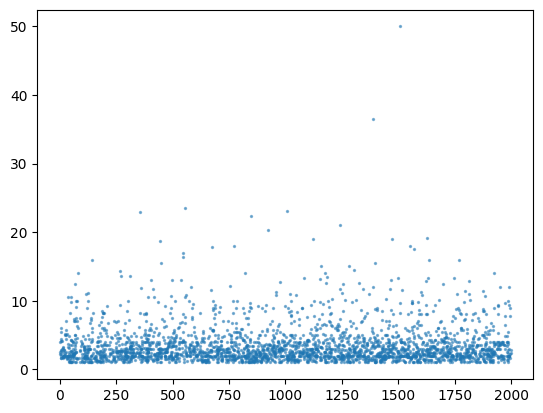

In [130]:
plt.scatter(ndet_df["map_dist"], ndet_df["mean_ndet"], s=2, alpha=0.5)

In [131]:
fig = make_subplots(
    cols=len(ndet_bins_maxs),
    rows=len(dist_bins_maxs),
    vertical_spacing=0.1,
    horizontal_spacing=0.1,
)

for col, ndet_max in enumerate(ndet_bins_maxs[:]):
    pattern = pattern_shape_sequence[col]
    ndet_min = ndet_bins_mins[col]
    ndet_mask = np.logical_and(
        ndet_min <= ndet_df["mean_ndet"], ndet_df["mean_ndet"] <= ndet_max
    )

    for row, dist_max in enumerate(dist_bins_maxs[:]):
        color = colors[row]

        dist_min = dist_bins_mins[row]
        dist_mask = np.logical_and(
            dist_min <= ndet_df["map_dist"], ndet_df["map_dist"] <= dist_max
        )

        binned_df = ndet_df[np.logical_and(ndet_mask, dist_mask)].copy()
        # fig.add_trace(go.Scatter(y=binned_df["mean_kilonovaness"], x=binned_df["median_ndet"], mode="markers"),
        #              row=row+1, col=col+1)

        kn_range = np.arange(0, 22)
        hist, bins = np.histogram(binned_df["mean_kilonovaness"], bins=kn_range)
        hist_rel = hist / sum(hist)
        # hist_std, bins_std = np.histogram(ndet_df["std_kilonovaness"], bins=bins)

        # print(len(hist_rel), len(bins))

        popt, pcov, info, msg, ier = curve_fit(
            gaus_curve, bins[:-1], hist_rel, p0=(1, 1), full_output=True
        )

        binned_gaus_dict[ndet_max][dist_max] = {"loc": popt[0], "scale": popt[1]}

        kn_fit_curve = gaus_curve(kn_range, *popt)

        fig.add_trace(
            go.Histogram(
                x=binned_df["mean_kilonovaness"],
                marker_pattern={"bgcolor": color, "shape": pattern},
                histnorm="probability",
                xbins={"start": 0, "end": 22, "size": 1},
            ),
            row=row + 1,
            col=col + 1,
        )

        fig.add_trace(
            go.Scatter(
                y=kn_fit_curve,
                x=kn_range,
                name="Gauss fit <br>(Least Squares)",
                line={"color": "crimson", "width": 4},
            ),
            row=row + 1,
            col=col + 1,
        )

        subplot_title = f"[{dist_min}, {dist_max}] Mpc; [{ndet_min}, {ndet_max}] ndet, <br> counts={len(binned_df)}"
        fig.add_annotation(
            xref="x domain",
            yref="y domain",
            showarrow=False,
            # The arrow head will be 25% along the x axis, starting from the left
            x=0,
            # The arrow head will be 40% along the y axis, starting from the bottom
            y=1.5,
            text=subplot_title,
            # arrowhead=2,
            row=row + 1,
            col=col + 1,
        )

fig.update_layout(
    height=1300,
    width=1000,
    title_text="Mean Kilonovaness, binned in GW map distance and ndet",
    showlegend=False,
    xaxis_title="kilonovaness",
)
fig.write_image("./pics/random/mean_kilonovaness_binned.pdf")
fig.show()

In [132]:
ndet_df

map  max_ndet  mean_ndet  std_ndet  median_ndet  \
0     1001096527         5   3.500000  1.500000          3.5   
1     1001369147         4   1.750000  1.299038          1.0   
2     1002163359         7   3.500000  2.598076          3.0   
3     1002712955        20   8.714286  5.547568          6.0   
4     1003125187        16   9.625000  5.406882         12.0   
...          ...       ...        ...       ...          ...   
2666   992714757         4   2.285714  1.160577          2.0   
2667   994987729         7   2.587500  1.357330          2.0   
2668   997264150        24   1.864078  2.845704          1.0   
2669   997346982         2   2.000000  0.000000          2.0   
2670   998442192         1   1.000000  0.000000          1.0   

      mean_kilonovaness  max_kilonovaness  median_kilonovaness  \
0              2.000000                 3                  2.0   
1              3.000000                 6                  2.5   
2              9.250000                11                  9.0   
3              7.714286                12                  9.0   
4              8.625000                11                  9.5   
...                 ...               ...                  ...   
2666           4.285714                10                  3.0   
2667           6.462500                17                  4.0   
2668           3.000000                13                  1.0   
2669           3.000000                 3                  3.0   
2670           6.000000                 6                  6.0   

      std_kilonovaness      map_ra    map_dec      map_time     map_dist  
0             1.000000  343.902677  71.181790  1.288862e+09   932.826672  
1             2.121320  269.457073  37.580435  1.255900e+09  1807.687558  
2             1.299038  173.325951  75.608849  1.345640e+09   399.012948  
3             3.194383  153.806650  56.824281  1.280963e+09  1465.875258  
4             2.341874  345.445982   5.986316  1.301311e+09  1506.997954  
...                ...         ...        ...           ...          ...  
2666          3.452299  267.962505 -26.238859  1.312586e+09   621.026365  
2667          4.868120    3.350454  54.328831  1.377744e+09   492.961005  
2668          3.140713   75.118348  82.675883  1.250863e+09  1166.463839  
2669          0.000000  295.679609  79.689293  1.277279e+09   398.862525  
2670          0.000000   72.920394  -6.004032  1.362558e+09  1913.321028  

[2671 rows x 13 columns]

2671
528
495
565
561
522


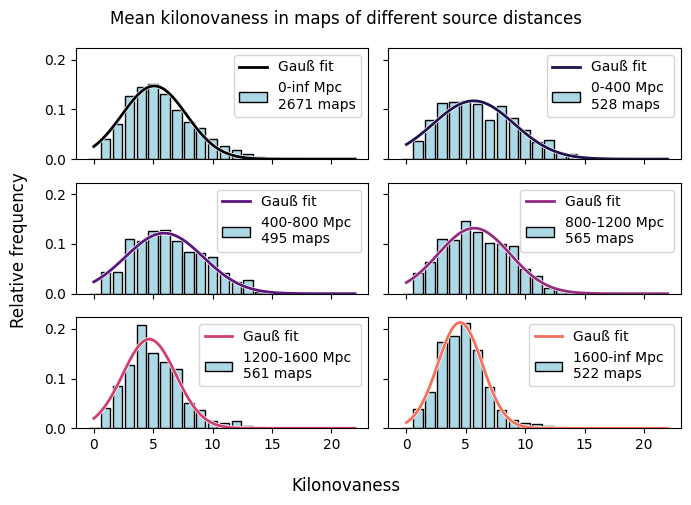

In [267]:
fig, axs = plt.subplots(3, 2, figsize=(7,5), sharex=True, sharey=True)
ax = None
m = 6
colors = plt.cm.magma(np.linspace(0,.7,m))  

for row, dist_max in enumerate(dist_bins_maxs[:]):
    #ax = fig.add_subplot(2, 3, row+1, sharey=ax)
    ax = axs.flatten()[row]

    dist_min = dist_bins_mins[row]
    dist_mask = np.logical_and(
        dist_min <= ndet_df["map_dist"], ndet_df["map_dist"] <= dist_max
    )

    #print(dist_min, dist_max, row)

    binned_df = ndet_df[dist_mask].copy()
    print(len(binned_df))
    # fig.add_trace(go.Scatter(y=binned_df["mean_kilonovaness"], x=binned_df["median_ndet"], mode="markers"),
    #              row=row+1, col=col+1)

    kn_range = np.arange(0, 22)
    kn_range_smooth = np.linspace(0, 22, 100)
    hist, bins = np.histogram(binned_df["mean_kilonovaness"], bins=kn_range)
    hist_rel = hist / sum(hist)
    # hist_std, bins_std = np.histogram(ndet_df["std_kilonovaness"], bins=bins)

    # print(len(hist_rel), len(bins))

    popt, pcov, info, msg, ier = curve_fit(
        gaus_curve, bins[:-1], hist_rel, p0=(1, 1), full_output=True
    )

    binned_gaus_dict[jsonify(str(ndet_max))][jsonify(str(dist_max))] = {"loc": popt[0], "scale": popt[1]}

    kn_fit_curve = gaus_curve(kn_range_smooth, *popt)


    ax.bar(bins[:-1], hist_rel, color="lightblue", edgecolor="black", label=f"{dist_min}-{dist_max} Mpc \n{hist.sum()} maps")
    ax.plot(kn_range_smooth, kn_fit_curve, color="white", linewidth=3)
    ax.plot(kn_range_smooth, kn_fit_curve, color=colors[row], label="Gauß fit", linewidth=2)
    ax.legend(loc="upper right")
    #ax.set_xlabel("Kilonovaness")
    #ax.set_ylabel("Relative frequency")
#fig.add_subplot(111, frameon=False)
#plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

# hide tick and tick label of the big axis

fig.suptitle("Mean kilonovaness in maps of different source distances")
fig.supxlabel("Kilonovaness")
fig.supylabel("Relative frequency")
fig.tight_layout()
fig.savefig(os.path.join(save_dir, "mean_kilonovaness_distbins.pdf"), dpi=300, bbox_inches="tight")

0 inf 0
2671
0 4 1
2016
4 10 2
664
10 inf 3
104


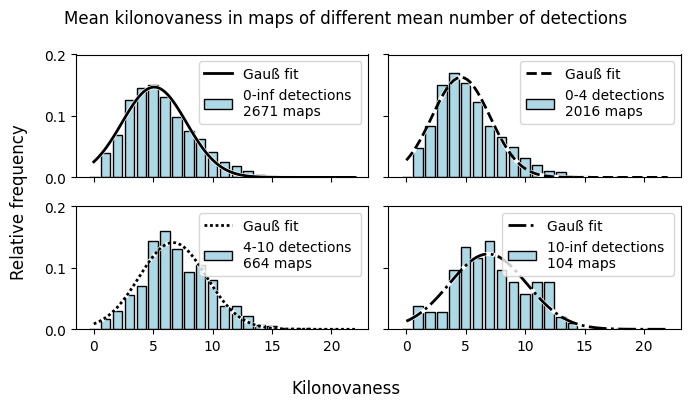

In [268]:
fig, axs = plt.subplots(2, 2, figsize=(7,4), sharex=True, sharey=True)
ax = None
m = 6
colors = plt.cm.magma(np.linspace(0,.7,m))  
dist_max = np.inf

styles=["solid", "dashed", (0, (1, 1)), "dashdot"]
for row, ndet_max in enumerate(ndet_bins_maxs[:]):
    #ax = fig.add_subplot(2, 3, row+1, sharey=ax)
    ax = axs.flatten()[row]

    ndet_min = ndet_bins_mins[row]
    ndet_mask = np.logical_and(
        ndet_min <= ndet_df["mean_ndet"], ndet_df["mean_ndet"] <= ndet_max
    )

    print(ndet_min, ndet_max, row)

    binned_df = ndet_df[ndet_mask].copy()
    print(len(binned_df))
    # fig.add_trace(go.Scatter(y=binned_df["mean_kilonovaness"], x=binned_df["median_ndet"], mode="markers"),
    #              row=row+1, col=col+1)

    kn_range = np.arange(0, 22)
    kn_range_smooth = np.linspace(0, 22, 100)
    hist, bins = np.histogram(binned_df["mean_kilonovaness"], bins=kn_range)
    hist_rel = hist / sum(hist)
    # hist_std, bins_std = np.histogram(ndet_df["std_kilonovaness"], bins=bins)

    # print(len(hist_rel), len(bins))

    popt, pcov, info, msg, ier = curve_fit(
        gaus_curve, bins[:-1], hist_rel, p0=(1, 1), full_output=True
    )

    binned_gaus_dict[jsonify(str(ndet_max))][jsonify(str(dist_max))] = {"loc": popt[0], "scale": popt[1]}

    kn_fit_curve = gaus_curve(kn_range_smooth, *popt)


    ax.bar(bins[:-1], hist_rel, color="lightblue", edgecolor="black", label=f"{ndet_min}-{ndet_max} detections \n{hist.sum()} maps")
    ax.plot(kn_range_smooth, kn_fit_curve, color="white", linestyle=styles[row], linewidth=3)
    ax.plot(kn_range_smooth, kn_fit_curve, color="black", label="Gauß fit", linestyle=styles[row], linewidth=2)
    ax.legend(loc="upper right")
    ax.set_yticks([0, 0.1, 0.2])
    #ax.set_xlabel("Kilonovaness")
    #ax.set_ylabel("Relative frequency")
#fig.add_subplot(111, frameon=False)
#plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

# hide tick and tick label of the big axis

fig.suptitle("Mean kilonovaness in maps of different mean number of detections")
fig.supxlabel("Kilonovaness")
fig.supylabel("Relative frequency")
fig.tight_layout()
fig.savefig(os.path.join(save_dir, "mean_kilonovaness_ndetbins.pdf"), dpi=300, bbox_inches="tight")

0 0 :: 0 4 :: 0 400
0 1 :: 0 4 :: 400 800
0 2 :: 0 4 :: 800 1200
0 3 :: 0 4 :: 1200 1600
0 4 :: 0 4 :: 1600 inf
1 0 :: 4 10 :: 0 400
1 1 :: 4 10 :: 400 800
1 2 :: 4 10 :: 800 1200
1 3 :: 4 10 :: 1200 1600
1 4 :: 4 10 :: 1600 inf
2 0 :: 10 inf :: 0 400
2 1 :: 10 inf :: 400 800
2 2 :: 10 inf :: 800 1200
2 3 :: 10 inf :: 1200 1600
2 4 :: 10 inf :: 1600 inf


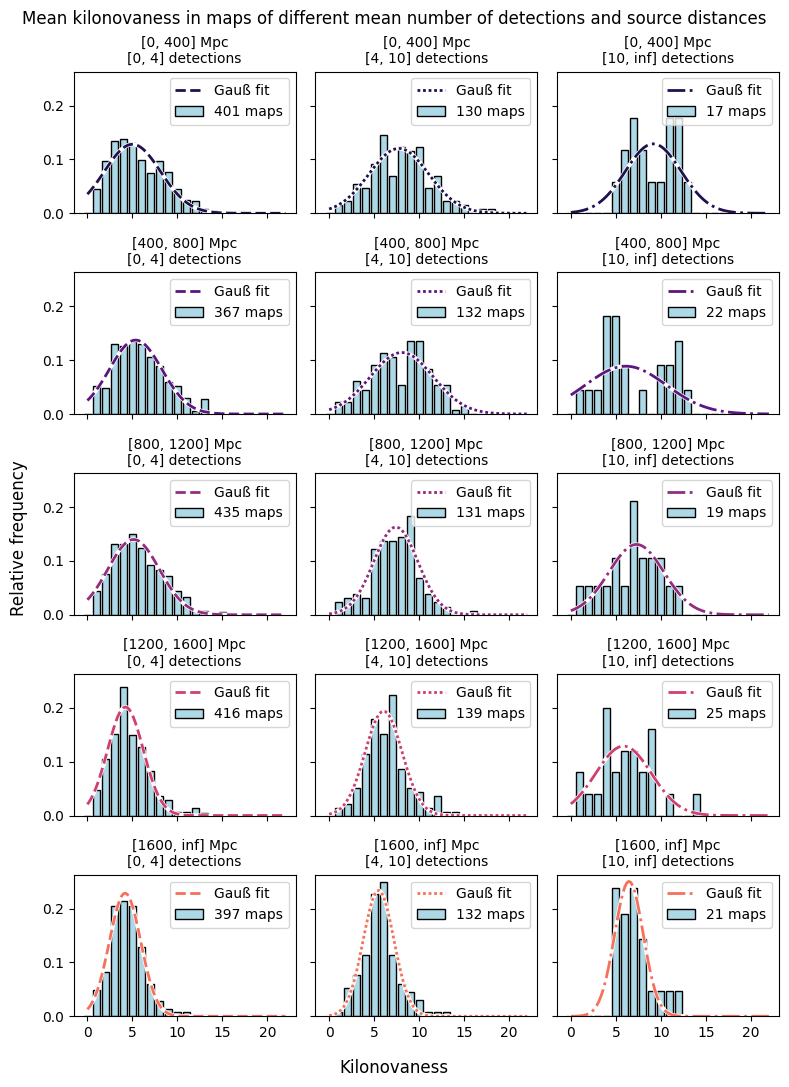

In [269]:
fig, axs = plt.subplots(5, 3, figsize=(8,11), sharex=True, sharey=True)

for col, ndet_max in enumerate(ndet_bins_maxs[1:]):
    pattern = pattern_shape_sequence[col]
    ndet_min = ndet_bins_mins[col+1]
    ndet_mask = np.logical_and(
        ndet_min <= ndet_df["mean_ndet"], ndet_df["mean_ndet"] <= ndet_max
    )

    for row, dist_max in enumerate(dist_bins_maxs[1:]):
        #print(row, col)
        ax = axs[row][col]
        color = colors[row]
        
        dist_min = dist_bins_mins[row+1]
        dist_mask = np.logical_and(
            dist_min <= ndet_df["map_dist"], ndet_df["map_dist"] <= dist_max
        )

        print(col, row, "::", ndet_min, ndet_max, "::", dist_min, dist_max)

        binned_df = ndet_df[np.logical_and(ndet_mask, dist_mask)].copy()
        # fig.add_trace(go.Scatter(y=binned_df["mean_kilonovaness"], x=binned_df["median_ndet"], mode="markers"),
        #              row=row+1, col=col+1)

        kn_range = np.arange(0, 22)
        hist, bins = np.histogram(binned_df["mean_kilonovaness"], bins=kn_range)
        hist_rel = hist / sum(hist)
        # hist_std, bins_std = np.histogram(ndet_df["std_kilonovaness"], bins=bins)

        # print(len(hist_rel), len(bins))

        popt, pcov, info, msg, ier = curve_fit(
            gaus_curve, bins[:-1], hist_rel, p0=(1, 1), full_output=True
        )

        binned_gaus_dict[jsonify(str(ndet_max))][jsonify(str(dist_max))] = {"loc": popt[0], "scale": popt[1]}

        kn_fit_curve = gaus_curve(kn_range_smooth, *popt)

        ax.bar(bins[:-1], hist_rel, color="lightblue", edgecolor="black", label=f"{len(binned_df)} maps")

        ax.plot(kn_range_smooth, kn_fit_curve, color="white", linestyle="solid", linewidth=3)
        ax.plot(kn_range_smooth, kn_fit_curve, color=colors[row+1], linestyle=styles[col+1], label="Gauß fit", linewidth=2)
        
        subplot_title = f"[{dist_min}, {dist_max}] Mpc\n[{ndet_min}, {ndet_max}] detections"
        ax.set_title(subplot_title, fontsize=10)
        ax.legend()

fig.suptitle("Mean kilonovaness in maps of different mean number of detections and source distances")
fig.supxlabel("Kilonovaness")
fig.supylabel("Relative frequency")
fig.tight_layout()

fig.savefig(os.path.join(save_dir, "mean_kilonovaness_distndet_bins.pdf"), dpi=300, bbox_inches="tight")

In [136]:
import json

In [270]:
binned_gaus_dict

{'Infinity': {'Infinity': {'loc': 6.457984377736521,
   'scale': 1.5920281860876575},
  '400': {'loc': 9.154239587126318, 'scale': 3.0958483610723384},
  '800': {'loc': 6.103487931389539, 'scale': 4.49660515488905},
  '1200': {'loc': 7.28763215746491, 'scale': 3.0556929656509353},
  '1600': {'loc': 5.853091066723782, 'scale': 3.0957530894703797}},
 '4': {'Infinity': {'loc': 4.182429864498191, 'scale': 1.7445552469768097},
  '400': {'loc': 4.995649168866816, 'scale': 3.1165376216803593},
  '800': {'loc': 5.357538752595383, 'scale': 2.9064734064081468},
  '1200': {'loc': 5.129391891584566, 'scale': 2.855105374918697},
  '1600': {'loc': 4.224668630802122, 'scale': 1.9801986061931514}},
 '10': {'Infinity': {'loc': 5.494710281338814, 'scale': 1.7061758246298504},
  '400': {'loc': 7.746077414664437, 'scale': 3.3160714576044126},
  '800': {'loc': 8.069259414146508, 'scale': 3.4951298860558424},
  '1200': {'loc': 7.407523285592465, 'scale': 2.4496168970014223},
  '1600': {'loc': 6.053105055377

In [271]:
dumps = json.dumps(binned_gaus_dict, indent=2)
data_dir = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/kilonovaness"
filename = os.path.join(data_dir, "binned_gaus_params.json")
with open(filename, "w") as file:
    file.write(dumps)
    file.close()

In [207]:
data_dir = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/kilonovaness"
binned_gaus_dict: dict = {}


with open(
    os.path.join(data_dir, "binned_gaus_params.json"), encoding="utf-8"
) as file:
    binned_gaus_dict = json.load(file, parse_constant=dejsonify)
    file.close()

In [139]:
ndet_df.sort_values(by="mean_kilonovaness", ascending=False).head()

map  max_ndet  mean_ndet  std_ndet  median_ndet  \
2374   756404665         6        6.0       0.0          6.0   
1737   304409197         4        4.0       0.0          4.0   
621   1443058235         4        4.0       0.0          4.0   
1912   422550513         4        4.0       0.0          4.0   
954   1674432456         5        5.0       0.0          5.0   

      mean_kilonovaness  max_kilonovaness  median_kilonovaness  \
2374               18.0                18                 18.0   
1737               17.0                17                 17.0   
621                16.0                16                 16.0   
1912               15.0                15                 15.0   
954                15.0                15                 15.0   

      std_kilonovaness      map_ra    map_dec      map_time    map_dist  
2374               0.0  217.396421  18.877369  1.244715e+09  140.921362  
1737               0.0   79.705078  47.624367  1.341605e+09  163.635140  
621                0.0   62.813276  35.577639  1.341644e+09  820.054921  
1912               0.0  188.421939  44.334866  1.362253e+09  739.448331  
954                0.0  249.099937  79.795883  1.300490e+09  371.969299

In [196]:
def dejsonify(arg):
    #print("got:",arg)
    try: 
        return float(arg)
    except ValueError:
        c = {"-Infinity":-np.inf, "Infinity":np.inf, "NaN":np.nan}
        return c[arg]

In [249]:
def get_keys(map_dist=np.inf, ndet=np.inf):
        global binned_gaus_dict
        ndet_key = np.inf
        map_key = np.inf
        if ndet:
            for key in np.sort([dejsonify(tkey) for tkey in binned_gaus_dict]):
                fkey = key
                #print("NDET key:: ", key, " is made ", fkey, " ", type(fkey), " ndet = ", ndet, " ", type(ndet))
                if ndet <= fkey:
                    ndet_key = key
                    break
        if ndet_key < np.inf:
            ndet_key = int(ndet_key)

        ndet_key_j = jsonify(str(ndet_key))

        if map_dist:
            for key in np.sort([dejsonify(tkey) for tkey in binned_gaus_dict[ndet_key_j]]):
                fkey = dejsonify(key)
                #print("distance keys: ", fkey)
                #print(fkey)
                if map_dist <= fkey:
                    map_key = key
                    break
        if map_key < np.inf:
            map_key = int(map_key)

        map_key_j = jsonify(str(map_key))
        return map_key_j, ndet_key_j

def get_kn_stats(map_dist=np.inf, ndet=np.inf):
    global binned_gaus_dict
    map_key, ndet_key = get_keys(map_dist=map_dist, ndet=ndet)

    print(ndet_key, map_key)
    return binned_gaus_dict[ndet_key][map_key]

def get_kn_cumprob(kilonovaness, map_dist=np.inf, ndet=np.inf):
    gaus_stats = get_kn_stats(map_dist=map_dist, ndet=ndet)

    return gaus_cdf(kilonovaness, loc=gaus_stats["loc"], scale=gaus_stats["scale"])

In [283]:
def get_kn_densitiy_stats(kilonovaness, map_area, map_dist=np.inf):
    map_key, _ = get_keys(map_dist=map_dist, ndet=np.inf)

    data_dir = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/kilonovaness"
    file_base = os.path.join(data_dir, "densities")

    density_files = os.listdir(file_base)
    file = [dfile for dfile in density_files if "-"+str(map_key) in dfile][0]

    dist_range = file[:file.find("_")]

    tmp_df = pd.read_csv(os.path.join(file_base, file), sep=";")
    tmp_df["kilonovaness"] = tmp_df["kilonovaness"].astype(int)
    tmp_df.index = tmp_df["kilonovaness"]
    
    exp_kn = map_area/1000 * tmp_df.iloc[kilonovaness]['rate-1000']
    exp_kn_pls = map_area/1000 * tmp_df.iloc[kilonovaness]['plus']
    exp_kn_min = exp_kn - map_area/1000 * tmp_df.iloc[kilonovaness]['minus']
    statement = f"For map of area = {map_area} squ.deg. at {dist_range} Mpc, expect {exp_kn:.1f} (+{exp_kn_pls:.1f} -{exp_kn_min:.1f}) candidates with kn = {kilonovaness}."
    print(statement)
    return tmp_df.loc[kilonovaness]

def get_kn_total_stats(kilonovaness, map_area, map_dist=np.inf, ndet=np.inf):
    gaus_stats = (1-get_kn_cumprob(kilonovaness, map_dist=map_dist, ndet=ndet)) * 100
    map_key, ndet_key = get_keys(map_dist=map_dist, ndet=ndet)
    print(f"Map at this distance (<{map_key}) with this ndet (<{ndet_key}), {gaus_stats}% of events have kn >= {kilonovaness}")

    res = get_kn_densitiy_stats(kilonovaness, map_area, map_dist=map_dist)

In [239]:
def gamma(params, data):
    loc = params[0]
    scale = params[1]
    a = params[2]
    return stats.gamma.pdf(data, a, loc=loc)


def gamma_log(params, data):
    loc = params[0]
    scale = params[1]
    a = params[2]
    return -stats.gamma.logpdf(data, a, scale=scale).sum()

In [287]:

get_kn_total_stats(12, 28, ndet=2, map_dist=40)

4 400
Map at this distance (<400) with this ndet (<4), 1.2304736350062462% of events have kn >= 12
For map of area = 28 squ.deg. at 0-400 Mpc, expect 0.0 (+0.0 -0.0) candidates with kn = 12.


In [288]:
get_kn_total_stats(12, 28, ndet=2000, map_dist=40000)

Infinity Infinity
Map at this distance (<Infinity) with this ndet (<Infinity), 0.024967581874990596% of events have kn >= 12
For map of area = 28 squ.deg. at 0-Infinity Mpc, expect 0.0 (+0.0 -0.0) candidates with kn = 12.


In [289]:
get_kn_total_stats(12, 28, ndet=20000, map_dist=40)

Infinity 400
Map at this distance (<400) with this ndet (<Infinity), 17.899070517221638% of events have kn >= 12
For map of area = 28 squ.deg. at 0-400 Mpc, expect 0.0 (+0.0 -0.0) candidates with kn = 12.


In [290]:
get_kn_total_stats(12, 28, ndet=2, map_dist=40000)

4 Infinity
Map at this distance (<Infinity) with this ndet (<4), 0.0003712530220356669% of events have kn >= 12
For map of area = 28 squ.deg. at 0-Infinity Mpc, expect 0.0 (+0.0 -0.0) candidates with kn = 12.


In [292]:
get_kn_total_stats(19, 28, ndet=20000, map_dist=40000)
get_kn_total_stats(19, 28, ndet=6, map_dist=40)
get_kn_total_stats(19, 28, ndet=2000, map_dist=40)
get_kn_total_stats(19, 28, ndet=6, map_dist=40000)

Infinity Infinity
Map at this distance (<Infinity) with this ndet (<Infinity), 1.6653345369377348e-13% of events have kn >= 19
For map of area = 28 squ.deg. at 0-Infinity Mpc, expect 0.0 (+0.0 -0.0) candidates with kn = 19.
10 400
Map at this distance (<400) with this ndet (<10), 0.03447110675964815% of events have kn >= 19
For map of area = 28 squ.deg. at 0-400 Mpc, expect 0.0 (+0.0 -0.0) candidates with kn = 19.
Infinity 400
Map at this distance (<400) with this ndet (<Infinity), 0.07355855056006% of events have kn >= 19
For map of area = 28 squ.deg. at 0-400 Mpc, expect 0.0 (+0.0 -0.0) candidates with kn = 19.
10 Infinity
Map at this distance (<Infinity) with this ndet (<10), 1.2212453270876722e-13% of events have kn >= 19
For map of area = 28 squ.deg. at 0-Infinity Mpc, expect 0.0 (+0.0 -0.0) candidates with kn = 19.


In [144]:
kn_range = np.arange(22, step=0.1)
hist, bins = np.histogram(ndet_df["mean_kilonovaness"], bins=kn_range)
hist_std, bins_std = np.histogram(ndet_df["std_kilonovaness"], bins=bins)

hist_rel = hist / sum(hist)

data = ndet_df["mean_kilonovaness"]
result = minimize(neg_log_like, x0=np.ones(2), args=(data,), method="Nelder-Mead")

result_gamma = minimize(gamma_log, x0=(0, 1, 7.5), args=(data,), method="Nelder-Mead")


kn_fit = gaus(result.x, kn_range)
# kn_fit_gamma = gamma((0, 0, 7.5), kn_range)
kn_fit_gamma = gamma(result_gamma.x, kn_range)

print(result_gamma)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 6453.673131292303
             x: [-6.419e-04  1.443e+00  4.180e+00]
           nit: 65
          nfev: 121
 final_simplex: (array([[-6.419e-04,  1.443e+00,  4.180e+00],
                       [-6.420e-04,  1.443e+00,  4.180e+00],
                       [-6.416e-04,  1.443e+00,  4.180e+00],
                       [-6.418e-04,  1.443e+00,  4.180e+00]]), array([ 6.454e+03,  6.454e+03,  6.454e+03,  6.454e+03]))


In [145]:
hist, bins = np.histogram(ndet_df["mean_kilonovaness"], bins=np.arange(20))
std_hist, bins = np.histogram(ndet_df["std_kilonovaness"], bins=np.arange(20))
print(hist, bins)
hist_rel = hist / sum(hist)
std_rel = std_hist/hist
# hist_std, bins_std = np.histogram(ndet_df["std_kilonovaness"], bins=bins)

print(len(hist_rel), len(bins))

popt, pcov, info, msg, ier = curve_fit(
    gaus_curve, bins[:-1], hist_rel, p0=(1, 1), full_output=True
)

kn_fit_curve = gaus_curve(kn_range, *popt)

print(popt, pcov, info)

[  0 107 186 338 387 401 348 262 200 168 109  69  49  28  10   6   1   1
   1] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
19 20
[5.08871826 2.71411333] [[ 0.01876188 -0.00043091]
 [-0.00043091  0.01283639]] {'fvec': array([ 0.0253482 ,  0.00719858,  0.0072862 , -0.01723006, -0.00926399,
       -0.00322147,  0.00864379,  0.01661878,  0.00780907, -0.01085943,
       -0.0122162 , -0.01211713, -0.01260085, -0.00838257, -0.00307341,
       -0.00205947, -0.00032892, -0.00036473, -0.0003726 ]), 'nfev': 37, 'fjac': array([[-1.00662633e-01,  2.19584946e-01,  8.30858131e-02,
        -1.63149384e-01, -4.16546729e-01, -5.37150278e-01,
        -4.51193156e-01, -2.11645166e-01,  4.55789721e-02,
         2.05094205e-01,  2.38028811e-01,  1.87937209e-01,
         1.15305995e-01,  5.76289985e-02,  2.40008075e-02,
         8.43665687e-03,  2.52324164e-03,  6.45554583e-04,
         1.41824206e-04],
       [-2.31192417e-03,  8.32308093e-02,  3.75224268e-01,
         3.96566445e-01,  3.0

/tmp/ipykernel_10877/3923696919.py:5: RuntimeWarning:

divide by zero encountered in divide



In [146]:
fig = go.Figure()


save_file = "./pics/mean_kilonovaness_unbinned_fit.pdf"


fig.add_trace(
    go.Bar(
        y=hist_rel,
        x=bins,
        name="Data",
        marker_color="lightblue",
        marker_line={"color": "black", "width": 4},
    )
)
# fig.add_trace(go.Scatter(y=kn_fit, x=kn_range, name="gaus loglike"))
# fig.add_trace(go.Scatter(y=kn_fit_gamma, x=kn_range, name="gamma"))
fig.add_trace(
    go.Scatter(
        y=kn_fit_curve,
        x=kn_range,
        name="Gauss fit <br>(Least Squares)",
        line={"color": "crimson", "width": 4},
    )
)
# fig.add_trace(go.Bar(y=hist, x=bins, name="Data 2"))
fig.add_vline(
    x=16,
    name="AT2017gfo 3 days post-merger",
    annotation={
        "text": "AT2017gfo 3 days   <br>post-merger",
        "align": "left",
        "font_size": 19,
    },
    annotation_position="left",
    line_color="forestgreen",
    line_dash="dot",
    line_width=5,
)
fig.update_layout(
    {
        "xaxis_title": "Mean kilonovaness",
        "width": 800,
        "title": f"Discretized mean kilonovaness in <br>{len(ndet_df) } randomly generated maps",
        "legend_visible": True,
    }
)
fig.update_layout(plot_bgcolor="white", font_size=17)
fig.update_xaxes(
    ticks="outside",
    showline=True,
    linecolor="black",
    gridcolor="white",
    range=(0, 18),
    tickfont_size=25,
    title_font_size=20,
)
fig.update_yaxes(
    ticks="outside",
    showline=True,
    linecolor="black",
    gridcolor="white",
    range=(0, 0.2),
    tickfont_size=25,
)
fig.show()
fig.write_image(save_file)

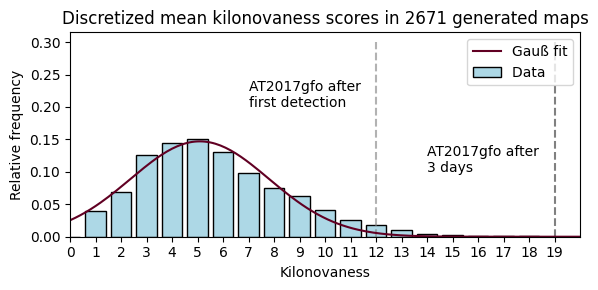

In [147]:
fig = plt.figure(figsize=(6,3))
gw_0 = 12
gw_3 = 19

ax = fig.add_subplot(111)

#ax.bar(bins[:-1], hist_rel, facecolor="lightblue", edgecolor="black", 
       #yerr=(np.clip(std_hist/sum(hist), 0, hist_rel),std_hist/sum(hist)), capsize=3, error_kw={"alpha": 0.5},
       #label="Data ")
ax.bar(bins[:-1], hist_rel, facecolor="lightblue", edgecolor="black", 
       #yerr=(np.clip(std_hist/sum(hist), 0, hist_rel),std_hist/sum(hist)), capsize=3, error_kw={"alpha": 0.5},
       label="Data ")
#ax.errorbar(bins[:-1], hist/sum(hist), yerr=(np.clip(std_hist/sum(hist), 0, hist_rel),std_hist/sum(hist)) , 
 #           capsize=3, color="xkcd:black", linestyle="none", alpha=0.5)

ax.vlines(gw_0, ymin=0, ymax=0.3, linestyles="dashed", color="grey", alpha=0.6)
ax.text(x=gw_0-5, y=0.2, s=f"AT2017gfo after \nfirst detection")

ax.vlines(gw_3, ymin=0, ymax=0.3, linestyles="dashed", color="grey")
ax.text(x=gw_3-5, y=0.1, s=f"AT2017gfo after \n3 days")

ax.plot(kn_range, kn_fit_curve, color="xkcd:burgundy", label="Gauß fit")

ax.set_xticks(np.arange(0,20))
ax.set_xlim((0, 20))
ax.legend()

ax.set_xlabel("Kilonovaness")
ax.set_ylabel("Relative frequency")
ax.set_title(f"Discretized mean kilonovaness scores in {sum(hist)} generated maps")

fig.tight_layout()
#ax2 = fig.add_subplot(212, sharex=ax)
#ax2.set_ylim((-0.01, 0.5))

#ax2.errorbar(bins[:-1], np.abs(hist_rel-gaus_curve(bins[:-1], *popt)), yerr= np.clip(std_rel, , capsize=3, color="xkcd:burgundy")
#ax2.errorbar(bins[1:], hist/sum(hist), yerr=(np.clip(std_hist/sum(hist), 0, hist_rel),std_hist/sum(hist)) , capsize=3, color="xkcd:burgundy")

fig.savefig("./pics/mean_kilonovaness_unbinned_fit_err.pdf", dpi=300, bbox_inches="tight")

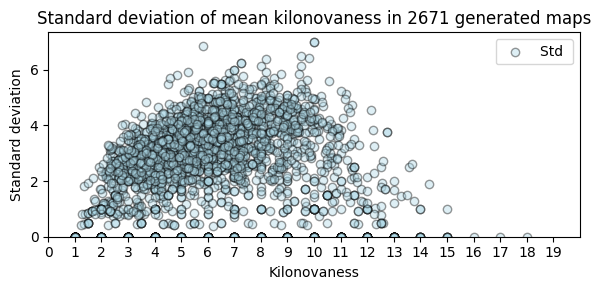

In [158]:
fig = plt.figure(figsize=(6,3))
gw_0 = 12
gw_3 = 19

ax = fig.add_subplot(111)

#ax.bar(bins[:-1], hist_rel, facecolor="lightblue", edgecolor="black", 
       #yerr=(np.clip(std_hist/sum(hist), 0, hist_rel),std_hist/sum(hist)), capsize=3, error_kw={"alpha": 0.5},
       #label="Data ")
ax.scatter(ndet_df["mean_kilonovaness"], ndet_df["std_kilonovaness"], facecolor="lightblue", edgecolor="black", 
       #yerr=(np.clip(std_hist/sum(hist), 0, hist_rel),std_hist/sum(hist)), capsize=3, error_kw={"alpha": 0.5},
       label="Std ", alpha=0.4)
#ax.errorbar(bins[:-1], hist/sum(hist), yerr=(np.clip(std_hist/sum(hist), 0, hist_rel),std_hist/sum(hist)) , 
 #           capsize=3, color="xkcd:black", linestyle="none", alpha=0.5)



ax.set_xticks(np.arange(0,20))
ax.set_xlim((0, 20))
ax.set_ylim(0)
ax.legend()

ax.set_xlabel("Kilonovaness")
ax.set_ylabel("Standard deviation")
ax.set_title(f"Standard deviation of mean kilonovaness in {sum(hist)} generated maps")

fig.tight_layout()
#ax2 = fig.add_subplot(212, sharex=ax)
#ax2.set_ylim((-0.01, 0.5))

#ax2.errorbar(bins[:-1], np.abs(hist_rel-gaus_curve(bins[:-1], *popt)), yerr= np.clip(std_rel, , capsize=3, color="xkcd:burgundy")
#ax2.errorbar(bins[1:], hist/sum(hist), yerr=(np.clip(std_hist/sum(hist), 0, hist_rel),std_hist/sum(hist)) , capsize=3, color="xkcd:burgundy")

#fig.savefig("./pics/mean_kilonovaness_unbinned_fit_err.pdf", dpi=300, bbox_inches="tight")

In [168]:
ndet_df["mean_kn_int"] = ndet_df["mean_kilonovaness"].astype(int)
agg_ndet = ndet_df.groupby(by="mean_kn_int").agg("mean")

agg_ndet

map  max_ndet  mean_ndet  std_ndet  median_ndet  \
mean_kn_int                                                             
1            1.165133e+09  3.196262   2.565383  0.345447     2.500000   
2            1.128476e+09  8.129032   2.556923  1.560968     2.139785   
3            1.057157e+09  7.662722   2.421090  1.581473     1.903846   
4            1.072928e+09  9.245478   2.952362  1.927551     2.360465   
5            1.097377e+09  9.119701   3.464879  2.372807     2.825436   
6            1.045917e+09  9.876437   3.759558  2.655038     3.031609   
7            1.080620e+09  9.835878   4.366537  2.644905     3.633588   
8            1.020393e+09  9.045000   4.056182  2.326801     3.590000   
9            1.002654e+09  8.791667   4.475576  2.226724     3.949405   
10           1.038191e+09  7.816514   4.430221  1.812689     4.064220   
11           1.130791e+09  7.159420   4.708017  1.673666     4.528986   
12           1.056468e+09  8.816327   6.588962  1.741163     6.418367   
13           9.616186e+08  5.000000   4.360863  0.544956     4.428571   
14           9.814633e+08  7.900000   6.875000  0.956458     7.050000   
15           1.187923e+09  5.333333   4.916667  0.416667     4.916667   
16           1.443058e+09  4.000000   4.000000  0.000000     4.000000   
17           3.044092e+08  4.000000   4.000000  0.000000     4.000000   
18           7.564047e+08  6.000000   6.000000  0.000000     6.000000   

             mean_kilonovaness  max_kilonovaness  median_kilonovaness  \
mean_kn_int                                                             
1                     1.152072          1.859813             1.028037   
2                     2.422992          7.161290             1.822581   
3                     3.407962          8.786982             2.739645   
4                     4.398974          9.790698             3.511628   
5                     5.366090         10.970075             4.357855   
6                     6.391547         11.566092             6.093391   
7                     7.363059         12.053435             7.681298   
8                     8.349688         12.500000             8.882500   
9                     9.298827         12.934524            10.050595   
10                   10.313594         13.009174            10.747706   
11                   11.234757         13.101449            11.492754   
12                   12.210633         13.489796            12.193878   
13                   13.097470         13.750000            13.160714   
14                   14.033333         14.500000            14.100000   
15                   15.000000         15.166667            15.000000   
16                   16.000000         16.000000            16.000000   
17                   17.000000         17.000000            17.000000   
18                   18.000000         18.000000            18.000000   

             std_kilonovaness      map_ra    map_dec      map_time  \
mean_kn_int                                                          
1                    0.261519  181.327089  29.458211  1.307469e+09   
2                    1.732578  182.142600  39.450037  1.297468e+09   
3                    2.206758  188.696005  33.347298  1.298753e+09   
4                    2.709640  187.175261  30.833763  1.302289e+09   
5                    3.244802  190.372114  31.691702  1.312534e+09   
6                    3.382508  183.316112  34.760149  1.316468e+09   
7                    3.289725  181.212073  32.771018  1.319210e+09   
8                    3.101640  164.497491  34.454643  1.320020e+09   
9                    2.954096  176.156186  28.342965  1.318697e+09   
10                   2.344958  176.337425  29.439675  1.316877e+09   
11                   1.557983  164.279948  28.752777  1.319510e+09   
12                   1.030813  173.798554  26.247722  1.316851e+09   
13                   0.510715  150.511393  39.406800  1.326005e+09   
14                   0.388562  175.181277  21.0649

Text(0, 0.5, 'Mean standard deviation')

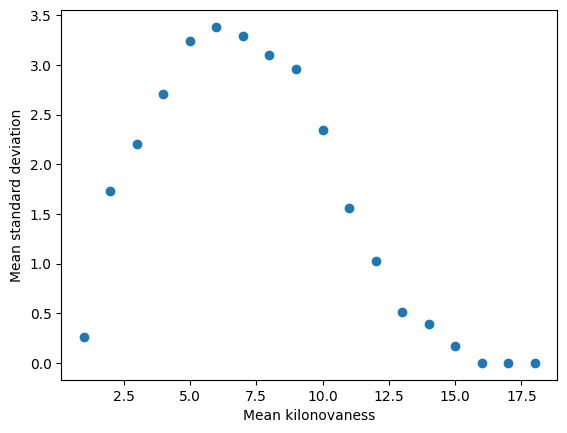

In [170]:
plt.scatter(agg_ndet.index, agg_ndet["std_kilonovaness"])
plt.xlabel("Mean kilonovaness")
plt.ylabel("Mean standard deviation")

In [149]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        y=binned_df["mean_kilonovaness"],
        x=binned_df["median_ndet"],
        mode="markers",
        name="mean kilonovaness",
    )
)
fig.add_trace(
    go.Scatter(
        y=binned_df["max_kilonovaness"],
        x=binned_df["median_ndet"],
        mode="markers",
        name="max kilonovaness",
        opacity=0.4,
    )
)
fig.show()

fig = go.Figure()

fig.add_trace(go.Histogram(x=binned_df["mean_kilonovaness"], name="mean kilonovaness"))
fig.add_trace(
    go.Histogram(x=binned_df["max_kilonovaness"], name="max kilonovaness", opacity=0.4)
)
fig.update
fig.show()